Why Transformers?

Earlier models like RNNs and LSTMs read sequences word by word.
That means they struggle with long sentences — they forget earlier context.

Transformers changed that.
1. They read the whole sentence at once and learn how words relate to each other using attention.

Core Idea

Instead of recurrence, Transformers use Self-Attention.

Input Sentence	Important Concept
“The cat sat on the mat.”	Each word looks at every other word to understand context.

Example:

For “cat”, the model also looks at “sat” and “mat”.

It figures out relationships like subject, verb, object — automatically.

Transformer Architecture (Simplified)

Two main parts:

Part	Purpose
Encoder	Reads the input (e.g., English sentence) and understands meaning.
Decoder	Uses that understanding to generate output (e.g., German translation).

Each part is built from blocks with:

Multi-Head Self-Attention

Feed-Forward Network

Layer Normalization & Residual Connections

Step-by-Step Flow
1️⃣ Input Embeddings

Convert words → vectors (numbers).

2️⃣ Add Positional Encoding

Since Transformers don’t read sequentially, we add position info so the model knows order.

3️⃣ Self-Attention

Each word attends to others → builds contextual representation.

4️⃣ Feed-Forward Network

Processes each position independently.

5️⃣ Stack Many Layers

Each layer refines understanding of relationships.

Step 1: The Problem Self-Attention Solves

When reading a sentence, we don’t look at just one word at a time —
we look at relationships between words.

Example:

The word “love” depends on “I” (who loves) and “AI” (what is loved).

To understand “love”, we must look at both “I” and “AI”.

That’s exactly what self-attention does —
each word looks at every other word to understand context.


In deep learning, words become vectors (embeddings).
Let’s assign a tiny 4-dimensional embedding to each word:

In [1]:
import torch
import torch.nn.functional as F

# Step 1: Represent the sentence
sentence = ["I", "love", "AI"]

# Let's say each word is represented by a 4-dim embedding
embeddings = {
    "I": torch.tensor([1.0, 0.0, 0.5, 0.0]),
    "love": torch.tensor([0.0, 1.0, 0.0, 0.5]),
    "AI": torch.tensor([0.5, 0.5, 1.0, 0.0])
}

# Stack the embeddings into a matrix (sequence_len × embedding_dim)
X = torch.stack([embeddings[w] for w in sentence])
print("Input Embeddings:\n", X)


Input Embeddings:
 tensor([[1.0000, 0.0000, 0.5000, 0.0000],
        [0.0000, 1.0000, 0.0000, 0.5000],
        [0.5000, 0.5000, 1.0000, 0.0000]])


Step 3: Queries, Keys, and Values (Q, K, V)

Every word now needs three roles:

Role	Meaning
Query (Q)	What this word is looking for
Key (K)	What this word offers to others
Value (V)	The actual information this word contains

In [8]:
# Random weight matrices (these would be learned in training)
torch.manual_seed(0)
d_model = 4
Wq = torch.rand(d_model, d_model)
Wk = torch.rand(d_model, d_model)
Wv = torch.rand(d_model, d_model)

# Compute Queries, Keys, Values
Q = X @ Wq
K = X @ Wk
V = X @ Wv


Step 4: Compute Attention Scores

To know how much attention one word pays to another,
we measure similarity between Query of one word and Key of another word:

The attention score between word *i* and word *j* is given by:

$$
\text{score}(i, j) = \frac{Q_i \cdot K_j}{\sqrt{d_k}}
$$


	​


That’s a dot product — large if two vectors point in the same direction.

In [6]:
# Scaled Dot-Product Attention
d_k = K.size(-1)
scores = Q @ K.T / torch.sqrt(torch.tensor(d_k, dtype=torch.float32))

# Convert scores to probabilities
weights = F.softmax(scores, dim=-1)
print("\nAttention Weights:\n", weights)



Attention Weights:
 tensor([[0.2774, 0.3150, 0.4075],
        [0.2253, 0.3947, 0.3800],
        [0.2270, 0.3414, 0.4316]])


Step 6: Combine Using Values (V)


Each word gathers information from all others, weighted by their attention scores:

$$
\text{Output}_i = \sum_j \left( \text{weight}_{ij} \times V_j \right)
$$


In [9]:
# Weighted sum of values
output = weights @ V
print("\nAttention Output (contextualized representations):\n", output)




Attention Output (contextualized representations):
 tensor([[0.5020, 0.7835, 0.8954, 0.5434],
        [0.4814, 0.8236, 0.9343, 0.6201],
        [0.5044, 0.8117, 0.9275, 0.5811]])


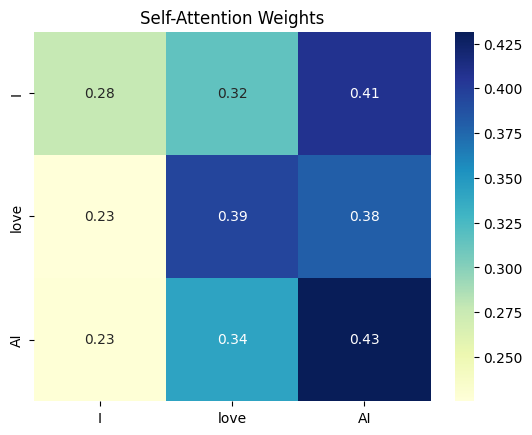

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(weights.detach().numpy(), 
            annot=True, cmap="YlGnBu", 
            xticklabels=["I", "love", "AI"], 
            yticklabels=["I", "love", "AI"])
plt.title("Self-Attention Weights")
plt.show()

